### Model traning

In [95]:
### import libary
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import *
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import *
from sklearn.model_selection import RandomizedSearchCV , train_test_split 
from sklearn.preprocessing import StandardScaler 
from xgboost import XGBRegressor
import warnings
from catboost import CatBoostRegressor
warnings.filterwarnings('ignore')


In [79]:
## load dataset

df = pd.read_csv('data/stud.csv')

In [80]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [81]:
# df['total score'] = df['math score'] + df['reading score'] + df['writing score']
# df['average'] = df['total score']/3

In [82]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [83]:
X=df.drop(columns=['math score'],axis=1)
y = df['math score']

In [84]:
X.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'reading score', 'writing score'],
      dtype='object')

In [85]:
num_fea = [feature for feature in X.columns if X[feature].dtype != 'O']

cat_fea = [feature for feature in X.columns if X[feature].dtype == 'O']

In [86]:
print(f'Category in gender variable : ',end=" ")
print(df.gender.unique())

print(f'Category in race/ethnicity variable : ',end=" ")
print(df['race/ethnicity'].unique())


print(f'Category in parental level of education  variable : ',end=" ")
print(df['parental level of education'].unique())


print(f'Category in lunch variable : ',end=" ")
print(df['lunch'].unique())

print(f'Category in test preparation course variable : ',end=" ")
print(df['test preparation course'].unique())

Category in gender variable :  ['female' 'male']
Category in race/ethnicity variable :  ['group B' 'group C' 'group A' 'group D' 'group E']
Category in parental level of education  variable :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Category in lunch variable :  ['standard' 'free/reduced']
Category in test preparation course variable :  ['none' 'completed']


In [87]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

num_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder', oh_transformer,cat_fea),
        ('StandardScaler', num_transformer,num_fea)
    ]
)

In [88]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(),
                                 ['gender', 'race/ethnicity',
                                  'parental level of education', 'lunch',
                                  'test preparation course']),
                                ('StandardScaler', StandardScaler(),
                                 ['reading score', 'writing score'])])

In [89]:
X = preprocessor.fit_transform(X)

In [90]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]], shape=(1000, 19))

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [99]:
def evaluate_model(true , predicted):
    mae = mean_absolute_error(true , predicted)
    mse = mean_squared_error(true , predicted)
    r2_s = r2_score(true , predicted)
    rmse = np.sqrt(mse)
    return mae , rmse , r2_s , mse

In [103]:
# Create model dictionary
model_dict = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(),
    "KNeighborsRegressor": KNeighborsRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "SVR": SVR(),
    "XGBRegressor": XGBRegressor(),
    "CatBoost": CatBoostRegressor()
}

# Initialize lists
model_list = []
r2_list = []

# Loop through models
for i in range(len(model_dict)):
    model = list(model_dict.values())[i]
    model.fit(X_train, y_train)

    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Evaluation
    model_mae_train, model_rmse_train, model_r2_train, _ = evaluate_model(y_train, y_pred_train)
    model_mae_test, model_rmse_test, model_r2_test, _ = evaluate_model(y_test, y_pred_test)

    # Get model name
    model_name = list(model_dict.keys())[i]

    # Print all evaluation metrics
    print("*******")
    print(f"Model: {model_name}")
    print(f"Train MAE: {model_mae_train:.4f}")
    print(f"Train RMSE: {model_rmse_train:.4f}")
    print(f"Train R2: {model_r2_train:.4f}")
    print(f"Test MAE: {model_mae_test:.4f}")
    print(f"Test RMSE: {model_rmse_test:.4f}")
    print(f"Test R2: {model_r2_test:.4f}")
    print("*******\n")

    # Store for comparison
    model_list.append(model_name)
    r2_list.append(model_r2_test)



*******
Model: LinearRegression
Train MAE: 4.2077
Train RMSE: 5.2692
Train R2: 0.8752
Test MAE: 4.3703
Test RMSE: 5.4967
Test R2: 0.8755
*******

*******
Model: Ridge
Train MAE: 4.2073
Train RMSE: 5.2696
Train R2: 0.8752
Test MAE: 4.3670
Test RMSE: 5.4951
Test R2: 0.8756
*******

*******
Model: Lasso
Train MAE: 5.1801
Train RMSE: 6.5393
Train R2: 0.8077
Test MAE: 5.3547
Test RMSE: 6.8057
Test R2: 0.8092
*******

*******
Model: ElasticNet
Train MAE: 6.1067
Train RMSE: 7.6883
Train R2: 0.7343
Test MAE: 6.4170
Test RMSE: 7.9696
Test R2: 0.7383
*******

*******
Model: KNeighborsRegressor
Train MAE: 4.5872
Train RMSE: 5.7037
Train R2: 0.8537
Test MAE: 5.6848
Test RMSE: 7.3447
Test R2: 0.7778
*******

*******
Model: DecisionTreeRegressor
Train MAE: 0.0224
Train RMSE: 0.3054
Train R2: 0.9996
Test MAE: 6.6939
Test RMSE: 8.5097
Test R2: 0.7017
*******

*******
Model: SVR
Train MAE: 5.0250
Train RMSE: 6.8886
Train R2: 0.7867
Test MAE: 5.7180
Test RMSE: 8.1532
Test R2: 0.7262
*******

*******
Mod

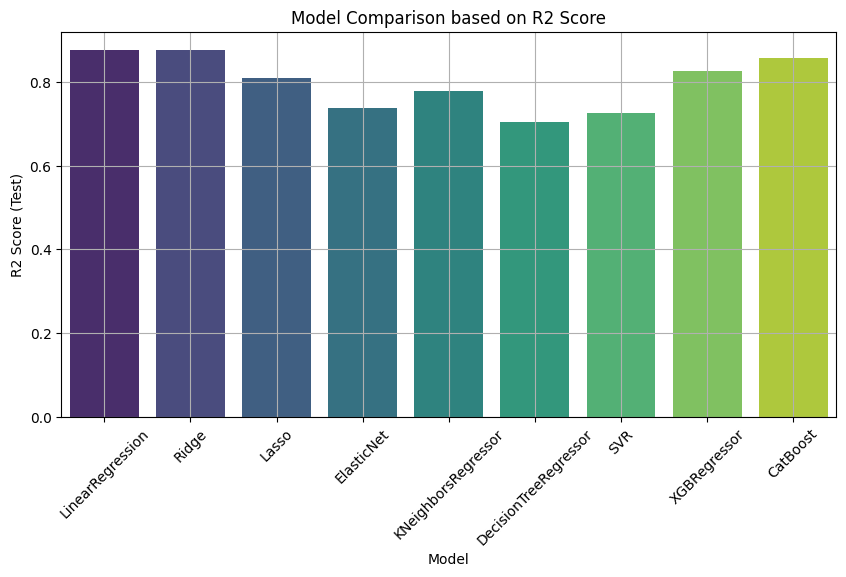

In [102]:
plt.figure(figsize=(10, 5))
sns.barplot(x=model_list, y=r2_list, palette="viridis")
plt.ylabel("R2 Score (Test)")
plt.xlabel("Model")
plt.title("Model Comparison based on R2 Score")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
